# Sentiment Based Product Recommendation System

# Problem Statement

The e-commerce business is quite popular today. Here, you do not need to take orders by going to each customer. A company launches its website to sell the items to the end consumer, and customers can order the products that they require from the same website. Famous examples of such e-commerce companies are Amazon, Flipkart, Myntra, Paytm and Snapdeal.

 

Suppose you are working as a Machine Learning Engineer in an e-commerce company named 'Ebuss'. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.

 

With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.

 

As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings. 

In order to do this, you planned to build a **sentiment-based product recommendation system**, which includes the following tasks.

 1. Data sourcing and sentiment analysis
 2. Building a recommendation system
 3. Improving the recommendations using the sentiment analysis model
 4. Deploying the end-to-end project with a user interface

The steps  involved in the project are given below:

- Exploratory data analysis
- Data cleaning
- Text preprocessing
- Feature extraction: In order to extract features from the text data, you may choose from any of the methods, including bag-of-words, TF-IDF vectorization or word embedding.
- Training a text classification model: You need to build at least three ML models. You then need to analyse the performance of each of these models and choose the best model. At least three out of the following four models need to be built (Do not forget, if required, handle the class imbalance and perform hyperparameter tuning.). 
    1. Logistic regression
    2. Random forest
    3. XGBoost
    4. Naive Bayes
- Building a recommendation system(User-based recommendation system, Item-based recommendation system)
- Improving the recommendations using the sentiment analysis model
- Evaluating the model and recommedation system using the Test data
- Create flask application
- Deploy the application to heroku platform

## Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# General purpose libraries
import re
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from datetime import datetime
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## Loading the Dataset

In [3]:
# importing dataset
df_reviews = pd.read_csv("Dataset/sample30.csv")
df_reviews.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


## Exploratory Data Analysis 

### Data Cleaning and Preprocessing

In [7]:
# Check shape of df_reviews
df_reviews.shape

(30000, 15)

In [4]:
# Show info
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

### Data Quality Check
Check for NULL/Missing values

In [5]:
# Function to check missing rows
def checkMissingRows(df):
    return df.isnull().sum()

In [6]:
# Call checkMissingRows function to check missing values in every rows
checkMissingRows(df_reviews)

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

In [8]:
# Missing values by percentage
print("Missing values by percentage")
null_info = df_reviews.isna().sum() / len(df_reviews) * 100
null_info.sort_values(ascending=False).head(50).round(4)

Missing values by percentage


reviews_userProvince    99.4333
reviews_userCity        93.5700
reviews_didPurchase     46.8933
reviews_doRecommend      8.5667
reviews_title            0.6333
manufacturer             0.4700
reviews_username         0.2100
reviews_date             0.1533
user_sentiment           0.0033
id                       0.0000
brand                    0.0000
categories               0.0000
name                     0.0000
reviews_rating           0.0000
reviews_text             0.0000
dtype: float64

### Data Cleaning and Preparation

In [10]:
# Drop the columns with less than 20% of values
missing_val_threshold = len(df_reviews) * .2
df_reviews.dropna(thresh=missing_val_threshold, axis=1, inplace=True)
print("Percentage of missing values:")
print(df_reviews.isna().mean().round(4)*100)

Percentage of missing values:
id                      0.00
brand                   0.00
categories              0.00
manufacturer            0.47
name                    0.00
reviews_date            0.15
reviews_didPurchase    46.89
reviews_doRecommend     8.57
reviews_rating          0.00
reviews_text            0.00
reviews_title           0.63
reviews_username        0.21
user_sentiment          0.00
dtype: float64


In [11]:
# Missing values by percentage after dropping columns
print("Missing values by percentage")
null_info = df_reviews.isna().sum() / len(df_reviews) * 100
null_info.sort_values(ascending=False).head(50).round(4)

Missing values by percentage


reviews_didPurchase    46.8933
reviews_doRecommend     8.5667
reviews_title           0.6333
manufacturer            0.4700
reviews_username        0.2100
reviews_date            0.1533
user_sentiment          0.0033
id                      0.0000
brand                   0.0000
categories              0.0000
name                    0.0000
reviews_rating          0.0000
reviews_text            0.0000
dtype: float64

In [12]:
# Remove the missing row of user_sentiment
df_reviews = df_reviews[~df_reviews.user_sentiment.isnull()]

In [13]:
# Map the categorical user_sentiment to numerical 1 or 0 for modelling
df_reviews['user_sentiment'] = df_reviews['user_sentiment'].map({'Positive':1, 'Negative': 0})

In [14]:
# Get the value count of user_sentiments column
df_reviews['user_sentiment'].value_counts(normalize=True)

1    0.887763
0    0.112237
Name: user_sentiment, dtype: float64

### Univariate Analysis

<Axes: xlabel='user_sentiment', ylabel='count'>

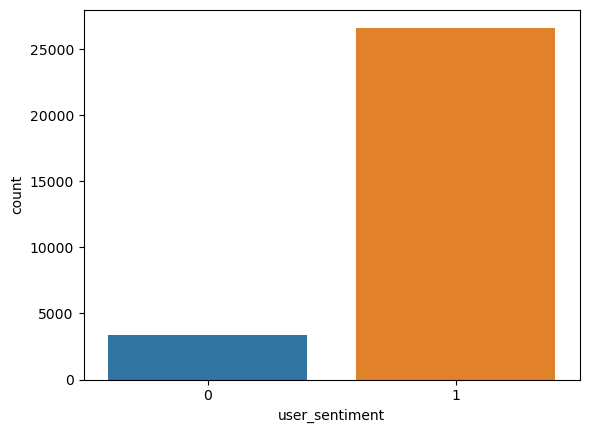

In [18]:
# Visualize using count plot
sns.countplot(x='user_sentiment', data=df_reviews, palette="Set2")

**We can see overrepresentation of Positive reviews. We may have to do Class Imbalnce techniques during modeling.**

In [21]:
df_reviews['reviews_rating'].describe()

count    29999.000000
mean         4.483116
std          0.988453
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: reviews_rating, dtype: float64

In [22]:
df_reviews['reviews_rating'].value_counts()

5    20830
4     6020
1     1384
3     1345
2      420
Name: reviews_rating, dtype: int64

<Axes: xlabel='reviews_rating', ylabel='count'>

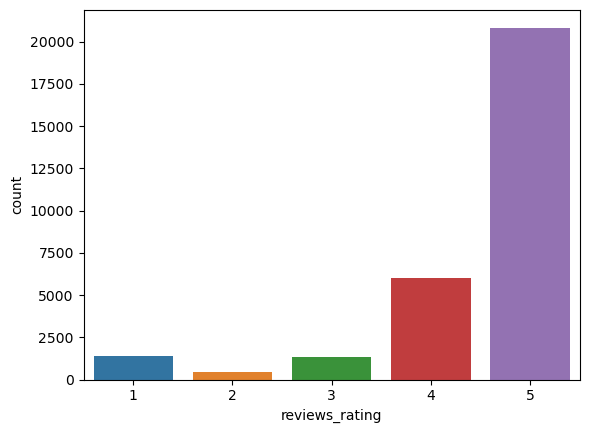

In [23]:
# Visualize the reviews_rating.
sns.countplot(x='reviews_rating', data=df_reviews)

### Positive user sentiment with reviews_rating

In [24]:
df_reviews[df_reviews['user_sentiment'] == 1]['reviews_rating'].describe()

count    26632.000000
mean         4.560378
std          0.865194
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: reviews_rating, dtype: float64

### Negative user sentiment with reviews_rating

In [26]:
df_reviews[df_reviews['user_sentiment'] == 0]['reviews_rating'].describe()

count    3367.000000
mean        3.871993
std         1.537589
min         1.000000
25%         3.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: reviews_rating, dtype: float64

### Positive user sentiment and reviews_rating less than 4

In [28]:
df_reviews[(df_reviews['user_sentiment'] == 1) & (df_reviews['reviews_rating'] < 4)] [['reviews_title', 'reviews_text', 'reviews_rating']]

,reviews_title,reviews_text,reviews_rating
9,Don't buy,Got as a surprise for my husband there is noth...,1
11,Waste of Money,Purchased this thinking it would have some sor...,1
14,Disappointed,First time purchase of this type of product. M...,1
18,Pretty nice,I bought this because it had better reviews th...,3
54,New formula is terrible,I used (and loved) this product for several ye...,1
...,...,...,...
29050,Didn't Do Much For Dryness,I received this product from Influenster. I ab...,3
29051,Not the best,I used this product for a month straight befor...,3
29053,clay conditioning,Got this item as a compliment from influenster...,3
29054,Eh,I am not in love with the conditioner. The cla...,3


### Negative user sentiment and reviews_rating greater than equal to 4

In [29]:
df_reviews[(df_reviews['user_sentiment'] == 0) & (df_reviews['reviews_rating'] >= 4)] [['reviews_title', 'reviews_text', 'reviews_rating']]

,reviews_title,reviews_text,reviews_rating
92,hydrating but not too heavy,It hydrates my skin. It is not too thick and h...,4
96,This product has made a real difference on my ...,In only a week I can see the difference in my ...,4
100,Noticed a difference in just two weeks!,This product has made my skin smoother and sup...,4
106,Very rich cream,I like to use this cream on my neck and collar...,4
117,Not greasy,I finally found a moisturizing product that wi...,4
...,...,...,...
29818,Great Product,I received a complimentary sample of this prod...,5
29855,Great,This has prolonged the color in my hair! Not o...,5
29858,Makes my hair soft and shiny without excess oil!,This conditioner makes my hair very soft witho...,5
29862,Great Conditioner,This conditioner has become a staple in my hai...,5


### Verify mismatch in User sentitment and reviews rating

In [30]:
pd.crosstab(df_reviews['user_sentiment'], df_reviews['reviews_rating'], margins=True)

reviews_rating,1,2,3,4,5,All
user_sentiment,,,,,,
0,597,140,220,550,1860,3367
1,787,280,1125,5470,18970,26632
All,1384,420,1345,6020,20830,29999


As per the above crosstab result, it's look to be mismatch between user_sentiment and reviews_rating. There are records those have higher user rating but user sentiment is negative and lower user rating but user sentiment is positive.

We can either clean up those records or update the target column to correct user sentiment, so that it will be helpful for modeling.

### Correction in user_sentiment as per below logic:

Here, updating the user_sentiment to 0(previously it was 1) when the revies_rating is less than 4, and updating the user_sentiment to 1(previously it was 0) when the reviews_rating is greater than or equal to 4.

In [32]:
df_reviews.loc[(df_reviews['user_sentiment'] == 1) & (df_reviews['reviews_rating'] < 4), 'user_sentiment'] = 0

In [33]:
df_reviews.loc[(df_reviews['user_sentiment'] == 0) & (df_reviews['reviews_rating'] >= 4), 'user_sentiment'] = 1

In [34]:
# Reverify mismatch in User sentiment and Reviews rating
pd.crosstab(df_reviews['user_sentiment'], df_reviews['reviews_rating'], margins=True)

reviews_rating,1,2,3,4,5,All
user_sentiment,,,,,,
0,1384,420,1345,0,0,3149
1,0,0,0,6020,20830,26850
All,1384,420,1345,6020,20830,29999
